In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("NSE-TATAGLOBAL11.csv")

In [3]:
df.head()
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

In [6]:
df1.shape

(1235,)

In [7]:
import matplotlib.pyplot as plt

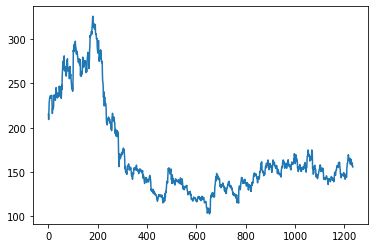

In [8]:
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [11]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1235, 1)

In [13]:
df1

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [14]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(864, 371)

In [16]:
import numpy

In [17]:
def create_dataset(dataset,time_step=1):

    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [18]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [19]:
print(x_train)

[[0.50425818 0.47758853 0.51792918 ... 0.64926042 0.62057373 0.62752129]
 [0.47758853 0.51792918 0.56006275 ... 0.62057373 0.62752129 0.6869117 ]
 [0.51792918 0.56006275 0.57485433 ... 0.62752129 0.6869117  0.82855222]
 ...
 [0.082026   0.07978485 0.07866428 ... 0.21313312 0.21066786 0.21313312]
 [0.07978485 0.07866428 0.09636934 ... 0.21066786 0.21313312 0.22680412]
 [0.07866428 0.09636934 0.07261318 ... 0.21313312 0.22680412 0.24607799]]


In [19]:
print(x_test.shape),print(y_test.shape)

(270, 100)
(270,)


(None, None)

In [20]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 243ms/step - loss: 0.0427 - val_loss: 0.0028
Epoch 2/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0080 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 5/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0023 - val_lo

In [25]:
import tensorflow as tf

In [26]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math

In [29]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

175.1074960935947

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

153.09094326637478

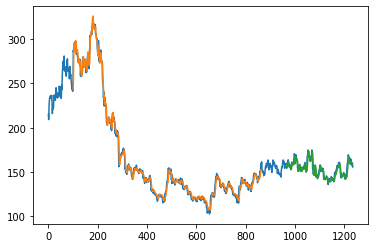

In [31]:
## plotting
# shift train prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict 
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

371

In [33]:
x_input=test_data[271:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
# demonstrate prediction for next 10 days
from numpy import array
n_steps=100
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.24157172]
101
1 day input [0.16651726 0.17279247 0.17951591 0.17637831 0.17234424 0.16898252
 0.16831017 0.16248319 0.16987898 0.17525773 0.18556701 0.18915285
 0.18354998 0.1824294  0.17256835 0.18108472 0.18153294 0.17055132
 0.17189601 0.16943075 0.17705065 0.16270731 0.17346481 0.18646347
 0.20416853 0.21156432 0.20259973 0.20461676 0.19520394 0.20797848
 0.22142537 0.22142537 0.22523532 0.23890632 0.2447333  0.24406096
 0.24137158 0.24271627 0.24069924 0.23442403 0.25930076 0.25907665
 0.25616316 0.24831914 0.26176602 0.2447333  0.23330345 0.22613178
 0.20103093 0.20416853 0.18870462 0.18287763 0.19049753 0.19766921
 0.19878978 0.20080681 0.19744509 0.19520394 0.19722098 0.19229045
 0.19789332 0.20909906 0.20730614 0.20170327 0.19004931 0.19206634
 0.17817122 0.17548185 0.18377409 0.19139399 0.18780816 0.20192739
 0.18511878 0.18668758 0.23263111 0.2415957  0.25750784 0.25862842
 0.27297176 0.29112506 0.29964142 0.29157329 0.27498879 0.27947109
 0.26781712 0.27162707 0.27431645

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

1235

In [39]:
df3=df1.tolist()
df3.extend(lst_output)

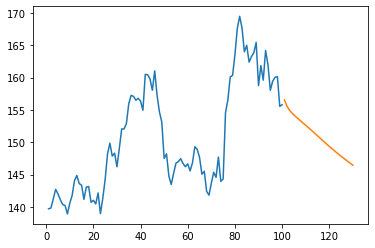

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

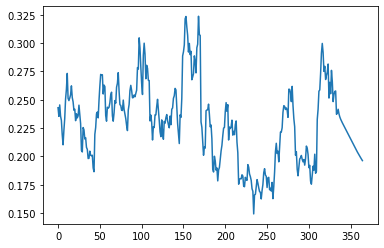

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])